In [2]:
import numpy as np 
import pandas as pd 
import cv2
import os
import joblib # to save the model
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Dense
from keras.models import load_model

# 1) Import model and encoder

In [3]:
# load the encoder and model
encoder = joblib.load("encoder.pkl")
model   = load_model("model.keras")

# 2) Import the data

In [4]:
# create a list with the images path and the corresponding label
images_path = []
labels = []
pieces = os.listdir("data")
for piece in pieces:
    images = os.listdir(os.path.join("data", piece))
    # for each image append the path and the label
    for image in images:
        images_path.append(os.path.join("data", piece, image))
        labels.append(piece) 


# load and normalize the images
images = []
for image in images_path:
    img = cv2.imread(image)
    img = np.array(img)
    img = img/255.0
    images.append(img)
print("Images: ", len(images))

encoder =  OneHotEncoder()
labels = np.array(labels).reshape(-1, 1) # reshape the labels to a Nx1 array
encoder_labels = encoder.fit_transform(labels).toarray() # one hot encode the labels

Images:  517


In [ ]:

encoder =  OneHotEncoder()
labels = np.array(labels).reshape(-1, 1) # reshape the labels to a Nx1 array
encoder_labels = encoder.fit_transform(labels).toarray() # one hot encode the labels

In [5]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(images, 
                                                    encoder_labels, 
                                                    test_size=0.25, 
                                                    random_state=104,
                                                    shuffle=True)

# convert the lists to numpy arrays
X_train=np.array(X_train)
X_test=np.array(X_test)

In [6]:
# data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

test_datagen = ImageDataGenerator() # default params --> no augmentation

In [7]:
bath_size = 32
train_generator = train_datagen.flow(X_train, y_train, batch_size=bath_size)
validation_generator = test_datagen.flow(X_test, y_test, batch_size=bath_size)

# 3) Test the loaded model

In [8]:
model.evaluate(validation_generator)

2/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9453 - loss: 0.2158 

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9370 - loss: 0.2299


[0.22013148665428162, 0.9384615421295166]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

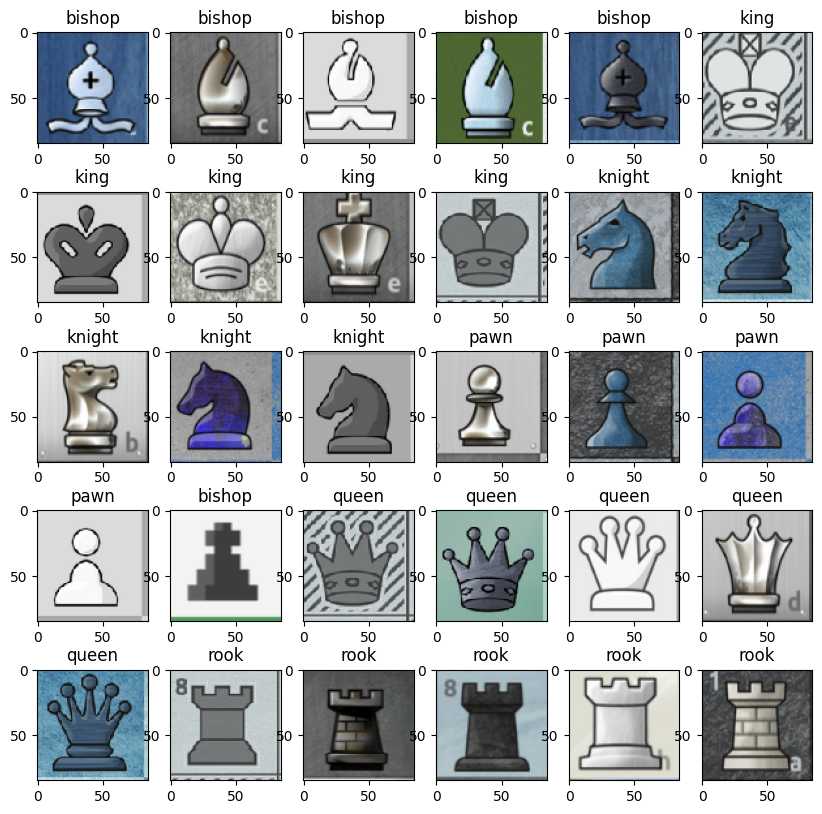

In [9]:
idth=50
height=50
rows = 5
cols = 6
axes=[]
fig=plt.figure(figsize=(10,10))
a=0
for directory in os.listdir('data'):
    for imgs in os.listdir(f'data/{directory}')[:5]:
        img=cv2.imread(f'data/{directory}/{imgs}')
        axes.append( fig.add_subplot(rows, cols, a+1) )
        a+=1
        plt.imshow(img)
        img=img/255
        img=np.expand_dims(img,axis=0)
        subplot_title=(pieces[np.argmax(model.predict(img))])
        axes[-1].set_title(subplot_title)
plt.show()